In [1]:
from functions import *



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3458158467793970166
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1271033856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14397545821718614318
physical_device_desc: "device: 0, name: GeForce GTX 680, pci bus id: 0000:01:00.0, compute capability: 3.0"
]


In [2]:
np.random.seed(1)
fldr = './img_data/numbers/'
dataset = PrepareData(fldr).run()


X train shape: (17000, 32, 32, 1)
Y train shape: (17000, 10)


X test shape: (3000, 32, 32, 1)
Y test shape: (3000, 10)


In [3]:
model_params = dict({'learning_rate': 0.005,
                     'num_epochs': 20,
                     'minibatch_size': 256,
                     'accuracy_batch': 100,
                     'print_cost': True,
                     'plot_from_epoch': 5,
                     'save_weights': True,
                     })


In [4]:
layers_params = dict({'layer1': dict({'filter': [32, 32, 1, 32],
                                      'strides': [1, 1, 1, 1],
                                      'padding': 'SAME',
                                      'mp_ksize': [1, 4, 4, 1],
                                      'mp_strides': [1, 4, 4, 1],
                                      'mp_padding': 'SAME'}),
                      'layer2': dict({'filter': [1, 1, 32, 64],
                                      'strides': [1, 1, 1, 1],
                                      'padding': 'SAME',
                                      'mp_ksize': [1, 2, 2, 1],
                                      'mp_strides': [1, 2, 2, 1],
                                      'mp_padding': 'SAME'}),
                      })


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



Cost after epoch 0: 23.223150


Cost after epoch 5: 0.129616


Cost after epoch 10: 0.065145


Cost after epoch 15: 0.074026


Cost after epoch 20: 0.064176


Cost after epoch 25: 0.101472


Cost after epoch 30: 0.061399


Cost after epoch 35: 0.049679


Cost after epoch 40: 0.047775


Cost after epoch 45: 0.187458


Cost after epoch 50: 0.035024


Cost after epoch 55: 0.089047


Cost after epoch 60: 0.071990


Cost after epoch 65: 0.038024


Cost after epoch 70: 0.040845


Cost after epoch 75: 0.041935


Cost after epoch 80: 0.079710


Cost after epoch 85: 0.035017


Cost after epoch 90: 0.038862


Cost after epoch 95: 0.046470


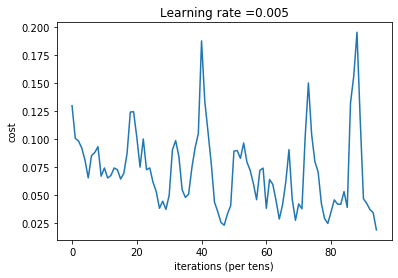

Train Accuracy: 0.99781066
Test Accuracy: 0.98655176


In [5]:
model_params['layers'] = len(layers_params.keys())
model_params['layers_params'] = layers_params

train_accuracy, test_accuracy, parameters = model(dataset, model_params)
print("Train Accuracy:", np.mean(train_accuracy))
print("Test Accuracy:", np.mean(test_accuracy))